<a href="https://colab.research.google.com/github/sharmadeep441/Handwritten-Character-Recognition-System/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(10000,)

In [ ]:
x_train.shape

(60000, 28, 28)

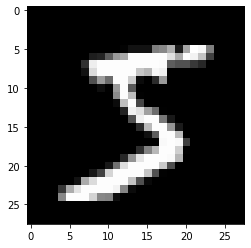

In [ ]:
plt.imshow(x_train[0], cmap = 'gray')

In [ ]:
y_train[0]

5

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


one hot encoding of labels

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_test_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_encoded.shape

In [ ]:
#Neural Network i.e. Y = W.X + B
x_train_reshape = np.reshape(x_train, (60000, 784))
x_test_reshape = np.reshape(x_test, (10000, 784))

set(x_train_reshape[0])

{0,
 1,
 2,
 3,
 9,
 11,
 14,
 16,
 18,
 23,
 24,
 25,
 26,
 27,
 30,
 35,
 36,
 39,
 43,
 45,
 46,
 49,
 55,
 56,
 64,
 66,
 70,
 78,
 80,
 81,
 82,
 90,
 93,
 94,
 107,
 108,
 114,
 119,
 126,
 127,
 130,
 132,
 133,
 135,
 136,
 139,
 148,
 150,
 154,
 156,
 160,
 166,
 170,
 171,
 172,
 175,
 182,
 183,
 186,
 187,
 190,
 195,
 198,
 201,
 205,
 207,
 212,
 213,
 219,
 221,
 225,
 226,
 229,
 238,
 240,
 241,
 242,
 244,
 247,
 249,
 250,
 251,
 252,
 253,
 255}

In [ ]:
x_mean = np.mean(x_train_reshape)
x_std = np.std(x_train_reshape)

epsilon = 1e-10

In [ ]:
x_train_norm = (x_train_reshape - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshape - x_mean)/(x_std + epsilon)

In [ ]:
set(x_train_norm[0])

{-0.4240738943910262,
 -0.41134598364562713,
 -0.39861807290022805,
 -0.38589016215482896,
 -0.30952269768243434,
 -0.2840668761916362,
 -0.24588314395543887,
 -0.22042732246464067,
 -0.19497150097384247,
 -0.13133194724684696,
 -0.11860403650144787,
 -0.10587612575604877,
 -0.09314821501064967,
 -0.08042030426525057,
 -0.042236572029053274,
 0.02140298169794222,
 0.03413089244334132,
 0.07231462467953861,
 0.12322626766113501,
 0.1486820891519332,
 0.16140999989733232,
 0.1995937321335296,
 0.2759611966059242,
 0.2886891073513233,
 0.3905123933145161,
 0.4159682148053143,
 0.4668798577869107,
 0.5687031437501034,
 0.5941589652409017,
 0.6068868759863008,
 0.6196147867316999,
 0.7214380726948927,
 0.75962180493109,
 0.772349715676489,
 0.9378125553666773,
 0.9505404661120763,
 1.026907930584471,
 1.0905474843114664,
 1.17964285952926,
 1.1923707702746593,
 1.2305545025108566,
 1.2560103240016547,
 1.268738234747054,
 1.294194056237852,
 1.306921966983251,
 1.3451056992194483,
 1.459656

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann = Sequential()

ann.add(Dense(units=128, activation='relu', input_shape = (784, )))

ann.add(Dense(units=128, activation='relu'))

ann.add(Dense(units=10, activation='softmax'))

In [ ]:
ann.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(x_train_norm, y_train_encoded, batch_size = 32, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8897
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1829 - accuracy: 0.9461
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1394 - accuracy: 0.9591
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1135 - accuracy: 0.9671
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0968 - accuracy: 0.9725
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0838 - accuracy: 0.9757
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0729 - accuracy: 0.9789
Epoch 8/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0648 - accuracy: 0.9814
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9834
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

In [ ]:
loss, accuracy = ann.evaluate(x_test_norm, y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9788


In [ ]:
y_pred = ann.predict(x_test_norm)

y_test_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
predicted = np.argmax(y_pred, axis=1)
predicted[0]


7

In [ ]:
y_test = np.argmax(y_test_encoded, axis=1)
y_test[0]


7

In [ ]:
print(np.concatenate((predicted.reshape(len(predicted),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(predicted, y_test)
print(cm)
accuracy_score(predicted, y_test)

[[ 972    0    2    0    0    3    5    1    4    1]
 [   0 1126    1    0    0    1    2    4    2    3]
 [   1    3 1012    3    4    0    1    9    4    0]
 [   0    1    3  987    1    9    1    2    7    5]
 [   0    0    3    0  963    1    7    2    2   11]
 [   0    1    0    4    1  868    5    0    2    4]
 [   2    2    0    0    3    4  933    0    2    1]
 [   1    1    7    4    1    1    2 1003    2    4]
 [   4    1    4    7    1    4    2    3  947    3]
 [   0    0    0    5    8    1    0    4    2  977]]


0.9788